In [65]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier, DummyRegressor

from sklearn.pipeline import make_pipeline

# Получение и первичное исследование данных (EDA, exploratory data analyze)

<p>Курс "Модели и методы интеллектуального анализа данных"</p>
<p>Чернышов Юрий</p>
<p>к.ф.-м.н., доцент кафедры ИТЗИ УрГУПС (Екатеринбург)</p>
<p>yuchernyshov@usurt.ru</p>
<p>ychernyshov@ussc.ru</p>

# Оглавление <a name='toc'></a>
<ol>
<li><a href='#intro'>Введение</a></li>
<li><a href='#sources'>Источники данных</a></li>
    <ol>
        <li> <a href='#text_files'>Текстовые файлы (txt, csv, xml, json)</a> </li>
        <li><a href='#api'>Открытые программные интерфейсы (API)</a></li>
        <li><a href='#databases'>Базы данных</a></li>
        <li><a href='#kaggle_datasets'>Датасеты kaggle</a></li>
        <li><a href='#sklearn_datasets'>sklearn.datasets</a></li>
        <li><a href='#cifar'>CIFAR</a></li>
        <li><a href='#mnist'>MNIST</a></li>
        <li><a href='#other'>Другие источники данных</a></li>
    </ol>    
<li><a href='#eda'>Этапы предварительного (разведочного) анализа данных</a>
<ol>
<li><a href='#first_look'>Предварительное изучение данных: правильность получения, природа, целостность, актуальность, адекватность</a>
</li>
<li><a href='#connections'>Выявление в данных взаимосвязей, кластеров</a></li>
<li><a href='#anomaly'>Анализ аномалий - причина, повторяемость, угроза для выборки</a></li>
<li><a href='#scale'>Шкалирование признаков</a></li>
<li><a href='#importance'>Выявление наиболее актуальных параметров</a></li>
<li><a href='#combination'>Комбинирование признаков</a></li>
<li><a href='#gipotese'>Проверка основных гипотез</a></li>
</ol>    
<li><a href='#models'>Модели</a></li>
    <ol>
    <li><a href='#simple_models'>Разработка и применение начальных простых моделей</a></li>
    <li><a href='#pipelines'>Построение конвейеров (pipelines)</a></li>
    </ol>    
<li><a href='#links'>Ссылки</a></li>
</ol>

# Введение <a name='intro'></a>

Для работы с данными нужны сами данные :-) Большинство рабочего времени специалиста по работе с данными уходит на получение, очистку, преобразование, предварительное исследование данных. От качества этой предварительной работы зависит качество, скорость, результативность работы моделей, использующих данные. Исходные данные низкого качества не может исправить никакая модель машинного обучения (принцип garbage-in-garbage-out).

Далее рассмотрены способы (источники) получения данных, этапы разведочного анализа данных (EDA), приведены примеры использования функций стандартных библиотек.

Для начала практического изучения рассматриваемых вопросов можно воспользоваться ресурсом "Google colab" https://colab.research.google.com/

Для удобства задачи разбиты на группы, к которым можно быстро перейти в <a href='#toc'>Оглавлении</a>.

Для работы с данными существуют различные возможности, от самых простых до сложных систем бизнес-аналитики (Business Intelligence, BI)
- Excel, в т.ч. множество встроенных функций и возможность простого программирования с помощью макросов Visual Basic
- различные математические пакеты программ: Statistica, MathCad, Maple,...
- встроенные инструменты фреймворков (PostgreSQL, Oracle)
- Python (pandas, matplotlib, numpy, sklearn, scipy и другие специализированные библиотеки)

Мы будем рассматривать инструментарий python.

<a href='#toc'>Назад к Оглавлению</a>

# Источники данных <a name='sources'></a>

Самый нерациональный (но тем не менее часто применяющийся и в настоящее время) способ создания данных - ручное внесение информации (заполнение таблиц, создание отчетов, "набивалки"). Однако все чаще появляются проекты с автоматизированным и унифицированным способом сбора, хранения, преобразования данных (что гораздо эффективнее).

Некоторые стандартные источники данных:
- текстовые файлы (txt, csv, xml, json и другие форматы)
- API для доступа к вебсервисам (yandex, facebook, Twitter, социальные сети, ...)
- базы данных
- OLAP-кубы
- результаты работы IoT устройств (датчики, счетчики)
- данные систем мониторинга

Кроме того, создано множество наборов данных (dataset), применяющихся как для обучения, так и для глобальных исследований
- "игрушечные" датасеты sklearn.datasets
- наборы данных на площадке соревнований по машинному обучению kaggle (kaggle.com)
- наборы изображений MNIST, CIFAR

Получение качественного набора данных часто еще более важная задача, чем построение модели машинного обучения. Такие данные представляют собой большую интеллектуальную ценность. В конкретных проектах таже необходимо учитывать законодательство - требования о защите персональных данных, коммерческой тайны и пр.

<a href='#toc'>Назад к Оглавлению</a>

## Текстовые файлы (txt, csv, xml, json) <a name='text_files'></a>

При чтении и записи для текстового файла этот файл необходимо открыть в соответствующем режиме ('r' - read/чтение, 'w' - write/запись, 'a' - append/добавление).

In [2]:
path_ = './data.txt'

with open(path_, 'w') as f: 
    f.write('1,2,3\n')
f.close()

with open(path_, 'r') as f: 
    s = f.read()
f.close()

print(s, end="")

if os.path.isfile(path_):
    os.remove(path_)    

1,2,3


csv (comma sepatered value) это текстовые файлы специального вида, данные разделены специальным символом, чаще всего запятой.

In [3]:
path_ = './data.csv'

with open(path_, 'w') as f: 
    f.write('1,2,3\n')
    f.write('4,5,6')
f.close()

with open(path_, 'r') as f: 
    data = [s.split(",") for s in f.read().split('\n')]
f.close()

print(data)

df = pd.read_csv(path_, names=list("ABC"))
display(df)

if os.path.isfile(path_):
    os.remove(path_)  

[['1', '2', '3'], ['4', '5', '6']]


,A,B,C
0,1,2,3
1,4,5,6


xml (extensible markup language) - язык разметки данных с использованием специальный блоков, обозначаемых тегами. Пример xml файла:

In [4]:
%%html
<xmp>
<?xml version="1.0" ?>
<Appointments>
    <appointment>
        <begin>1181251680</begin>
        <uid>040000008200E000</uid>
        <alarmTime>1181572063</alarmTime>
    </appointment>
</Appointments>
</xmp>

Существуют различные стандартные билиотеки для работы с xml, например, в Python это minidom, ElementTree, BeautifulSoap

Объектная нотация JSON (JavaScript Object Notation) используется при сериализации структур данных (преобразованию к виду, похожему на словарь).

In [5]:
import json
d = {'personal data': {   
                        'surname': 'Ivanov', 
                        'name': 'Ivan'
                    },
    'age': 42, 'height': 171, 'weight': 80}
print(d)

s = json.dumps(d)
print(s)

d = json.loads(s)
print(d)

{'personal data': {'surname': 'Ivanov', 'name': 'Ivan'}, 'age': 42, 'height': 171, 'weight': 80}
{"personal data": {"surname": "Ivanov", "name": "Ivan"}, "age": 42, "height": 171, "weight": 80}
{'personal data': {'surname': 'Ivanov', 'name': 'Ivan'}, 'age': 42, 'height': 171, 'weight': 80}


<a href='#toc'>Назад к Оглавлению</a>

## Открытые программные интерфейсы API <a name='api'></a>

Экспортируем данные из открытого API github.com

In [6]:
import requests
endpoint = 'https://api.github.com/users/yurichernyshov/repos'
repos = json.loads(requests.get(endpoint).text)
for elem in repos:
    print(elem['name'])

BlogNote
Data-Science-Course-USURT
datasets
Examples
Games
Information-Systems-Course-USURT
PRE
simbank
usurt-docker-practice


В большинстве API вебсервисов перед использованием необходимо зарегистрироваться и получить ключ. Пример испольнования запроса с истекшим токеном:

In [7]:
!curl -H 'X-Gismeteo-Token: 56b30cb255.3443075' 'https://api.gismeteo.net/v2/weather/current/4368/'

{"meta":{"message":"Invalid token. Check the 'X-Gismeteo-Token' header","code":401},"response":{}}


<a href='#toc'>Назад к Оглавлению</a>

## Базы данных <a name='databases'></a>


Стандартным источником информации в производственных информационных системах являются базы данных - хранилища большого объема информации. В зависимости от прикладных задач для хранения данных может быть выбран соответствующий тип базы данных (реляционная, NoSQL, графовая). На выбор типа БД является: структура информации для хранения (эффективно ли зранить в таблицах), тип файлов, необходимая скорость доступа, взаимосвязи между элементами.

Для работы с реляционными базами данных используют SQL запросы.

Примеры SQL запросов:

<b><font color='green'>SELECT</font> model, speed, hd <font color='green'>FROM</font> PC <font color='green'>WHERE</font> price<500 </b>

<b><font color='green'>SELECT</font> model,price <font color='green'>FROM</font> Printer<b>  
<b>
    <font color='green'>WHERE</font> price=(<font color='green'>SELECT MAX</font>(price) <font color='green'>FROM</font> Printer)
    </b>

<b><font color='green'>SELECT DISTINCT</font> Product.type, Laptop.model, Laptop.speed <font color='green'>FROM</font> Product</b>
    <b><font color='green'>JOIN</font> Laptop <font color='green'>ON</font> Laptop.model=Product.model</b>
    <b><font color='green'>WHERE</font> speed < <font color='green'>ANY</font> (<font color='green'>SELECT MIN</font>(speed)<font color='green'>FROM</font> PC)</b>

Для python существует легкая база данных SQLite, хорошо подходящая для небольших проектов.

In [8]:
import sqlite3

path_ = './mydb.db'

conn = sqlite3.connect(path_)

c = conn.cursor()
c.execute("CREATE TABLE test (name char(255), id int);")
c.fetchall()

c = conn.cursor()
c.execute("INSERT INTO test VALUES ('Petr', 1);")
c.fetchall()

c = conn.cursor()
c.execute("SELECT * FROM test;")
c.fetchall()

[('Petr', 1)]

In [9]:
# удалим файл с базой данных
if os.path.isfile(path_):
    os.remove(path_)
    
os.path.isfile(path_)

False

<a href='#toc'>Назад к Оглавлению</a>

## Датасеты kaggle <a name='kaggle_datasets'></a>

Платформа для соревнований по машинному обучению https://www.kaggle.com/datasets содержит большое количество данных, один из критериев оценки участников сообщества kaggle - оценка размещенных участниками датасетов. Содержит как тренировочные данные, так и данные для решения глобальных задач (предсказание объема продаж Walmart, предсказание динамики распространения коронавируса)

## sklearn.datasets <a name='sklearn_datasets'></a>

sklearn.datasets содержит много заранее подготовленных "игрушечных" датасетов небольшого размера, на которых удобно изучать применение различных методов машинного обучения. Есть датасеты для задач классификации, регрессии, распознавания текстов, разпознавания изображений. Например:

- load_digits() - 1797 образцов рукописных цифр, для тренировки алгоритмов классификации изображений
- load_boston() - 697 образцов цен на жилье, для тренировки алгоритмов регрессии
- load_iris() - 150 образцов измерений цветка ириса, для тренировки алгоритмов классификации

Также можно создать наборы данных самостоятельно с использованием функций sklearn make_regression, make_classification, make_blobs

In [10]:
from sklearn.datasets import make_friedman1
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
print(len(X), len(X[0]))

50 10


С помощью функции sklear.dataset.make_circles можно создать множество точек.

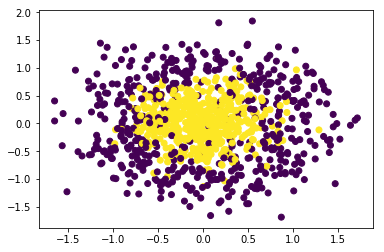

In [11]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
points, color = make_circles(n_samples=1000, shuffle=True, noise=0.3, random_state=1, factor=0.3)
plt.scatter(np.array(points)[:,0],np.array(points)[:,1], c=color)
plt.show()

Набор рукописных цифр.

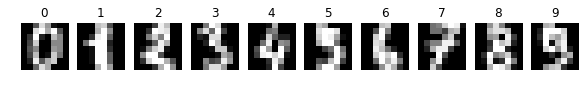

In [12]:
from sklearn.datasets import load_digits
data = load_digits()
fig, ax = plt.subplots(1, 10, figsize=(10,5))
for i in range(10):
    ax[i].imshow(data.data[i].reshape(8,8), cmap='gray')
    ax[i].grid(False)
    ax[i].axis('off')
    ax[i].set_title(data.target[i])

In [13]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

Набор изображений.

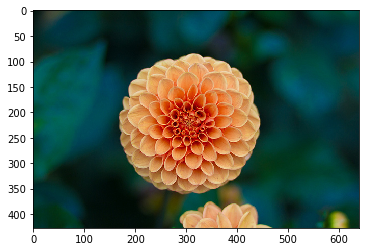

In [14]:
from sklearn.datasets import load_sample_images
data = load_sample_images()
plt.imshow(data.images[1])
plt.show()

Также в scikit-learn есть удобная функция, которая позволяет импортировать данные напрямую с сайта openml.org, на котором хранится более 21000 различных датасетов.

In [15]:
from sklearn.datasets import fetch_openml

In [16]:
X, y = fetch_openml("wine", version=1, as_frame=True, return_X_y=True)
X.shape, y.shape

((178, 13), (178,))

In [17]:
X

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class, Length: 178, dtype: category
Categories (3, object): ['1', '2', '3']

<a href='#toc'>Назад к Оглавлению</a>

## CIFAR <a name='cifar'></a>

<a href='#toc'>Назад к Оглавлению</a>

## MNIST <a name='mnist'></a>

<a href='#toc'>Назад к Оглавлению</a>

## Другие источники данных <a name='other'></a>

Через открытые источники можно получать информацию для анализа из социальных сетей, twitter и т.п.

Перечень популярных API (например, прогноз погоды, фильмы, финансовый анализ) для Python можно найти здесь: https://rapidapi.com/collection/list-of-python-apis

<a href='#toc'>Назад к Оглавлению</a>

# Этапы предварительного (разведочного) анализа данных <a name='eda'></a>

#### Типовой набор данных для демонстрации работы методов

In [19]:
num = 100
df = pd.DataFrame({
        'Date': pd.date_range('20130102', periods=num, freq='1w'),
        'Visitors': np.random.randint(0,10, num),
        'Income': np.random.random(num)*100,
        'Type': pd.Categorical(np.random.choice(['Regular', 'Unique', 'Irregular'], size=num)),
        'Par1': np.random.choice(np.r_[np.linspace(-10,10,20), np.NaN*10], size=num)
                  })
df

,Date,Visitors,Income,Type,Par1
0,2013-01-06,2,39.136707,Regular,-5.789474
1,2013-01-13,1,27.894806,Regular,-3.684211
2,2013-01-20,1,16.990417,Regular,3.684211
3,2013-01-27,2,18.871052,Unique,-0.526316
4,2013-02-03,2,55.389991,Irregular,-2.631579
...,...,...,...,...,...
95,2014-11-02,7,64.887560,Regular,-8.947368
96,2014-11-09,0,82.476198,Regular,-7.894737
97,2014-11-16,0,12.668036,Unique,-1.578947
98,2014-11-23,7,39.070912,Irregular,-0.526316


In [20]:
df.head(2)

,Date,Visitors,Income,Type,Par1
0,2013-01-06,2,39.136707,Regular,-5.789474
1,2013-01-13,1,27.894806,Regular,-3.684211


In [21]:
df.tail(1)

,Date,Visitors,Income,Type,Par1
99,2014-11-30,0,45.17819,Regular,NaN


In [22]:
print("df.shape: {}, rows: {}, columns: {}".format(df.shape, df.shape[0], df.shape[1]))

df.shape: (100, 5), rows: 100, columns: 5


In [23]:
df.info(), df.Par1.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      100 non-null    datetime64[ns]
 1   Visitors  100 non-null    int64         
 2   Income    100 non-null    float64       
 3   Type      100 non-null    category      
 4   Par1      99 non-null     float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(1)
memory usage: 3.5 KB


(None, 1)

In [24]:
df.describe()

,Visitors,Income,Par1
count,100.000000,100.000000,99.000000
mean,4.340000,50.631312,-0.760234
std,2.656115,28.073929,6.171930
min,0.000000,0.781008,-10.000000
25%,2.000000,28.798334,-6.842105
50%,4.000000,48.832762,-0.526316
75%,7.000000,73.872511,3.684211
max,9.000000,99.693807,10.000000


<a href='#toc'>Назад к Оглавлению</a>

## Предварительное изучение данных: правильность получения, природа, целостность, актуальность, адекватность <a name='first_look'></a>

#### Пример некорректных данных

<table border=1>
    <thead><th>Дата</th><th>ФИО</th><th>Результат</th></thead>
    <tr>
        <td>29 декабря 2019</td><td>Иванов И.И.</td><td>14.01</td>
    </tr>
    <tr>
        <td>29 декабря 1019</td><td>Иванов Ваня</td><td>12,02</td>
    </tr>
    <tr>
        <td>31 февраля 2020</td><td></td><td>14</td>
    </tr>
    <tr>
        <td>01 апреля 2020</td><td>Петров П.П.</td><td>-100</td>
    </tr>
</table>

Типичные ошибки: некорректные даты, разные форматы ФИО (отсутствует отчество), разные форматы чисел, пропущенные данные.

В библиотеке pandas реализовано множество методов для анализа данных.

<li>Общая информация о данных</li>
<ul>    <li>df.info() - общая информация о таблице (индексы, строки, типы, ненулевые значения),</li>
        <li>df.shape() - размеры, </li>
        <li>df.columns(), df.index() - колонки, индексы</li>
        <li>df.describe(), df.describe(include=['object', 'bool']) - общая статистическая информация по численным значениям</li>
</ul>
<li>Агрегированная информация о данных</li>
<ul>
    <li>df.value_counts() - подсчет частотности значений для типов Categorical и Boolean,</li>
    <li>df.sort_values(by='название столбца', ascending=False/True) - сортировка,</li>
    <li>df.mean(), .min(), .max(), .std(), .var(), .count() - агрегационные функции,</li>
    <li>groupby, crosstab, pivot_table - сводные таблицы</li>
</ul>
</ol>

#### Типы данных, пропущенные значения

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      100 non-null    datetime64[ns]
 1   Visitors  100 non-null    int64         
 2   Income    100 non-null    float64       
 3   Type      100 non-null    category      
 4   Par1      99 non-null     float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(1)
memory usage: 3.5 KB


#### Информация о столбцах df.columns

In [26]:
print(df.columns)
for vColName in df.columns[1::2]:
    print("{}: {}".format(vColName, df[vColName].unique()))

Index(['Date', 'Visitors', 'Income', 'Type', 'Par1'], dtype='object')
Visitors: [2 1 5 0 4 6 8 3 9 7]
Type: ['Regular', 'Unique', 'Irregular']
Categories (3, object): ['Regular', 'Unique', 'Irregular']


#### Статистическая информация

In [27]:
df

,Date,Visitors,Income,Type,Par1
0,2013-01-06,2,39.136707,Regular,-5.789474
1,2013-01-13,1,27.894806,Regular,-3.684211
2,2013-01-20,1,16.990417,Regular,3.684211
3,2013-01-27,2,18.871052,Unique,-0.526316
4,2013-02-03,2,55.389991,Irregular,-2.631579
...,...,...,...,...,...
95,2014-11-02,7,64.887560,Regular,-8.947368
96,2014-11-09,0,82.476198,Regular,-7.894737
97,2014-11-16,0,12.668036,Unique,-1.578947
98,2014-11-23,7,39.070912,Irregular,-0.526316


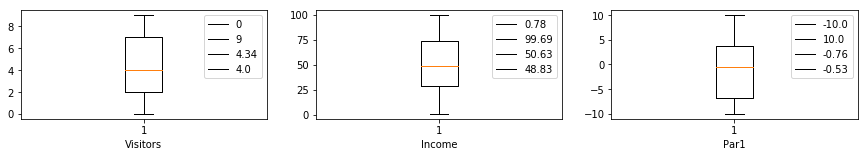

In [28]:
fig, ax = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(2)
for i, vColName in enumerate(['Visitors', 'Income','Par1']):
    ax[i].boxplot(df[vColName].dropna())
    ax[i].set_xlabel(vColName)  
    ax[i].legend([round(f(df[vColName].dropna()),2) for f in [min,max,np.mean,np.median]],loc=1)
plt.show()

In [29]:
df.describe()

,Visitors,Income,Par1
count,100.000000,100.000000,99.000000
mean,4.340000,50.631312,-0.760234
std,2.656115,28.073929,6.171930
min,0.000000,0.781008,-10.000000
25%,2.000000,28.798334,-6.842105
50%,4.000000,48.832762,-0.526316
75%,7.000000,73.872511,3.684211
max,9.000000,99.693807,10.000000


In [30]:
df

,Date,Visitors,Income,Type,Par1
0,2013-01-06,2,39.136707,Regular,-5.789474
1,2013-01-13,1,27.894806,Regular,-3.684211
2,2013-01-20,1,16.990417,Regular,3.684211
3,2013-01-27,2,18.871052,Unique,-0.526316
4,2013-02-03,2,55.389991,Irregular,-2.631579
...,...,...,...,...,...
95,2014-11-02,7,64.887560,Regular,-8.947368
96,2014-11-09,0,82.476198,Regular,-7.894737
97,2014-11-16,0,12.668036,Unique,-1.578947
98,2014-11-23,7,39.070912,Irregular,-0.526316


#### groupby

In [31]:
df.groupby('Type')['Income'].max()

Type
Irregular    99.693807
Regular      98.640564
Unique       99.586717
Name: Income, dtype: float64

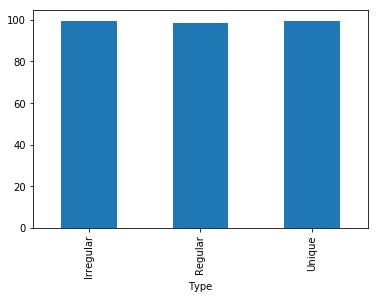

In [32]:
df.groupby('Type')['Income'].max().plot(kind='bar')
plt.show()

In [33]:
df.groupby('Type')['Income'].sum()

Type
Irregular    1718.992797
Regular      1919.324450
Unique       1424.813932
Name: Income, dtype: float64

#### crosstab

Показывает для двух категориальных типов количество пересечений их значений.

In [34]:
pd.crosstab(df['Type'], df['Visitors'])

Visitors,0,1,2,3,4,5,6,7,8,9
Type,,,,,,,,,,
Irregular,2,2,3,4,4,4,3,5,7,3
Regular,4,5,5,2,5,3,3,5,3,1
Unique,2,1,8,3,3,2,5,2,1,0


#### pivot_table

Строит агрегирующие статистические таблицы - столбцы и колонки объединяются в группы по определенным признакам и для этих групп вычисляются агрегационные функции (сумма, минимум, максимум всех значений в группе и т.п.)

In [35]:
df

,Date,Visitors,Income,Type,Par1
0,2013-01-06,2,39.136707,Regular,-5.789474
1,2013-01-13,1,27.894806,Regular,-3.684211
2,2013-01-20,1,16.990417,Regular,3.684211
3,2013-01-27,2,18.871052,Unique,-0.526316
4,2013-02-03,2,55.389991,Irregular,-2.631579
...,...,...,...,...,...
95,2014-11-02,7,64.887560,Regular,-8.947368
96,2014-11-09,0,82.476198,Regular,-7.894737
97,2014-11-16,0,12.668036,Unique,-1.578947
98,2014-11-23,7,39.070912,Irregular,-0.526316


Найти сумму выручки ('Income') для конкретных значений Type и Visitor.

In [36]:
df.pivot_table(index='Type', columns='Visitors', values='Income', aggfunc={np.sum}, fill_value=0)

sum                                                  \
Visitors            0           1           2           3           4   
Type                                                                    
Irregular   94.146354  109.736945  165.818560  215.047388  182.601961   
Regular    226.133619  300.649600  240.045705   73.618663  392.667527   
Unique      48.967510   74.236489  440.433850  191.353188  175.859710   

                                                                       
Visitors            5           6           7           8           9  
Type                                                                   
Irregular  174.853002  108.516526  239.754885  247.603981  180.913195  
Regular    127.377172   80.357414  207.402395  229.638017   41.434338  
Unique     191.293017  173.235193  103.935843   25.499133    0.000000

<a href='#toc'>Назад к Оглавлению</a>

## Выявление в данных взаимосвязей, кластеров <a name='connections'></a>

#### Парадокс Симпсона

Выявленные закономерности в отдельных частях выборки могут коренным образом отличаться от аналогичных закономерностей для всей выборки, что может вводить исследователей данных в заблуждение. Ниже пример, когда для каждой из двух частей (синей и желтой) выборки корреляция отрицательная, а в целом для выборки (зеленая) - положительная.

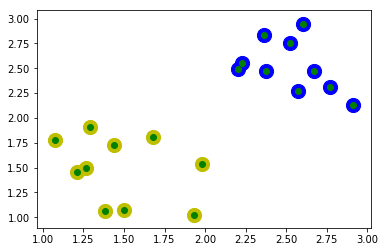

In [37]:
np.random.seed(7)
Yellows = np.random.random(size=(10,2))+1
Blues = np.random.random(size=(10,2))+2
Greens = np.r_[Yellows, Blues]
plt.scatter(Yellows[:, 0], Yellows[:, 1], color="y", s=200)
plt.scatter(Blues[:, 0], Blues[:, 1], color="b", s=200)
plt.scatter(Greens[:, 0], Greens[:, 1], color="g")
plt.show()

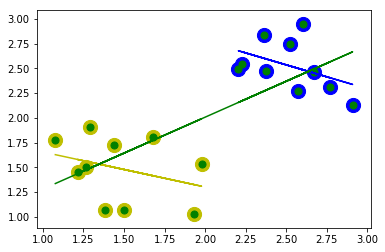

In [38]:
plt.scatter(Yellows[:, 0], Yellows[:, 1], color="y", s=200)
plt.scatter(Blues[:, 0], Blues[:, 1], color="b", s=200)
plt.scatter(Greens[:, 0], Greens[:, 1], color="g", s=50)

model = LinearRegression()

model.fit(Blues[:, 0].reshape(-1, 1), Blues[:, 1])
plt.plot(Blues[:, 0], model.predict(Blues[:, 0].reshape(-1,1)), color="b")

model.fit(Yellows[:, 0].reshape(-1, 1), Yellows[:, 1])
plt.plot(Yellows[:, 0], model.predict(Yellows[:, 0].reshape(-1, 1)), color="y")

model.fit(Greens[:, 0].reshape(-1, 1), Greens[:, 1])
plt.plot(Greens[:, 0], model.predict(Greens[:, 0].reshape(-1, 1)), color="g")

plt.show()

#### Корреляция

Показывает линейную взаимосвязь между отдельными столбцами данных.

In [39]:
df.corr()

,Visitors,Income,Par1
Visitors,1.000000,-0.112597,0.215767
Income,-0.112597,1.000000,0.030688
Par1,0.215767,0.030688,1.000000


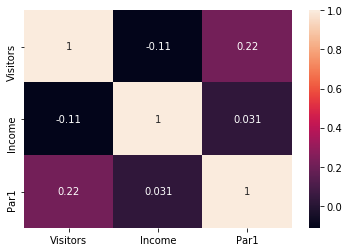

In [40]:
sns.heatmap(df.corr(), annot=True)
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

## Анализ аномалий - причина, повторяемость, угроза для выборки <a name='anomaly'>


#### pyplot.boxplot

Удобное средство визуализации данных. Можно увидеть минимум, максимум, медиану, 25% и 75% перцентили, выбросы.

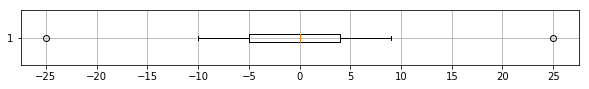

In [41]:
spikes = [-25, 25]
x = np.r_[np.random.randint(low=-10, high=10, size=100), spikes]

plt.figure(figsize=(10,1))
plt.boxplot(x, vert=False)
plt.xticks(np.arange(x.min(), x.max()+1, 5))
plt.grid(True)
plt.show()

#### Влияние выбросов на качество модели

Причиной выброса может быть неисправность прибора, ошибка измерения и т.п. В том случае если значение выброса существенно отличается от остальных значений - он может сильно исказить общую картину.

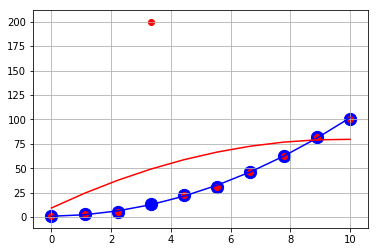

In [42]:
xs = np.linspace(0, 10, 10)
ys = xs**2 + 3*np.random.random(10)

model = LinearRegression()
xs_poly = PolynomialFeatures(2).fit_transform(xs.reshape(-1,1))
model.fit(xs_poly, ys)
result = model.predict(xs_poly)

plt.scatter(xs, ys, c='b', s=150)
plt.plot(xs, result, c='b')


ys[3] = 200
xs_poly = PolynomialFeatures(2).fit_transform(xs.reshape(-1,1))
model.fit(xs_poly, ys)
result = model.predict(xs_poly)

plt.scatter(xs, ys, c='r')
plt.plot(xs, result, c='r')

plt.grid(True)
plt.show()

В зависимости от конкретной ситуации выбросы можно удалять из общей выборки, заменять средним значением, применять логарифмирование, либо добавлять специальный признак выброса, чтобы информировать модель.

<a href='#toc'>Назад к Оглавлению</a>

## Шкалирование признаков <a name='scale'></a>

Масштабирование значений признаков (шаклирование) необходимо для большинства моделей для того, чтобы привести значения разных признаков к одной шкале.

#### Заменить значения из диапазона (0,100) значениями из диапазона (0,10)

In [43]:
np.random.seed(1)
a = np.random.randint(1, 101, 10)
print(a)

# sklearn.preprocessing.MinMaxScaler()
minmax_scale = MinMaxScaler(feature_range=(0,10))
a_scaled = minmax_scale.fit_transform(a.reshape(-1,1))
print(np.round(a_scaled.ravel(),2))

[38 13 73 10 76  6 80 65 17  2]
[ 4.62  1.41  9.1   1.03  9.49  0.51 10.    8.08  1.92  0.  ]


#### Преобразовать данные, чтобы среднее значение было 0, а дисперсия - 1

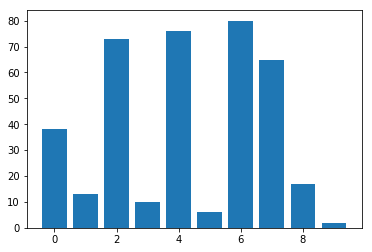

In [44]:
plt.bar([i for i in range(len(a))], a)
plt.show()

In [45]:
# sklearn.preprocessing.StandardScaler()
a_norm_scaled = StandardScaler().fit_transform(a.reshape(-1,1))

<BarContainer object of 10 artists>

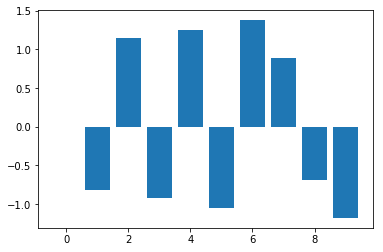

In [46]:
plt.bar([i for i in range(len(a))], a_norm_scaled.flatten())

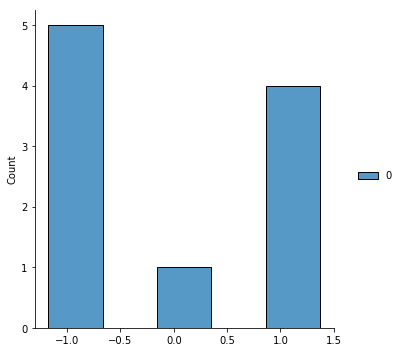

In [47]:
sns_plot = sns.displot(a_norm_scaled)

<a href='#toc'>Назад к Оглавлению</a>

## Выявление наиболее актуальных параметров <a name='importance'></a>


Некоторые признаки оказывают на моделируемый процесс существенно меньшее влияние, чем остальные. Иногда целесообразно отказаться от части признаков (столбцов данных) с назначительной потерей качества, но значительным выигрышем в скорости вычислений.

In [48]:
from sklearn.datasets import load_iris

In [49]:
data = load_iris()
dir(data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [50]:
pd.DataFrame(data.data, columns=data.feature_names).head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [51]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, 
                                                    test_size=0.3, shuffle=True, 
                                                    stratify=data.target,
                                                    random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

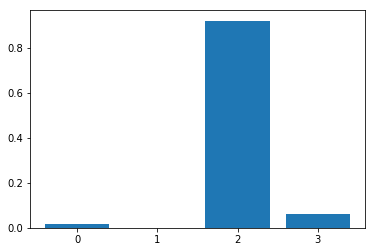

[0.01904762 0.         0.92172619 0.05922619]
0.9777777777777777


In [52]:
model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
plt.bar(x=range(4), height=model.feature_importances_)
plt.xticks(range(4))
plt.show()
print(model.feature_importances_)
print(model.score(X_test, y_test))

In [53]:
model = DecisionTreeClassifier(random_state=42).fit(X_train[:,2].reshape(-1,1), y_train)
plt.show()
print(model.score(X_test[:,2].reshape(-1,1), y_test))

0.9111111111111111


<a href='#toc'>Назад к Оглавлению</a>

## Комбинирование признаков, конструирование новых признаков <a name='combination'></a>

#### Линейные комбинации признаков

Иногда полезно из имеющихся признаков составить новые, используя различные математические операции: сложение, вычитание, деление, умножение на константу, вычисление экспоненты, логарифмирование.

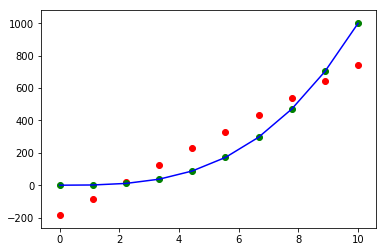

In [54]:
xs = np.linspace(0, 10, 10)
ys = xs**3 + np.random.random(10)*2

model = LinearRegression()
model.fit(xs.reshape(-1,1), ys)
result1 = model.predict(xs.reshape(-1,1))

xs_poly = PolynomialFeatures(3).fit_transform(xs.reshape(-1,1))
model.fit(xs_poly, ys)
result2 = model.predict(xs_poly)

plt.plot(xs, xs**3, c='b')
plt.scatter(xs, result1, c='r')
plt.scatter(xs, result2, c='g')

plt.show()

In [55]:
#preprocessing.FunctionTransformer

#### Группировка признаков с помощью кластеризации

In [56]:
from sklearn.cluster import KMeans

In [57]:
a = np.array([np.random.randint(1,100) for _ in range(10)])
print(a)
print(KMeans(3).fit(a.reshape(-1,1)).predict(a.reshape(-1,1)))

[88 88 95 97 87 14 10  8 64 62]
[1 1 1 1 1 0 0 0 2 2]


<a href='#toc'>Назад к Оглавлению</a>

## Проверка основных гипотез <a name='gipotese'></a>

<ol>
    <li>Критерий Пирсона</li>
    <li>Проверка законов распределения</li>
    <li>A/B тестирование</li>
</ol>

In [58]:
from scipy.stats import pearsonr
# тест корреляции Пирсона
corr, p = pearsonr(xs, ys)
print(corr, p)

0.9086103518715262 0.0002729757433239503


In [59]:
# тест Стьюдента (различие образцов)
from scipy.stats import ttest_ind
stat, p = ttest_ind(xs, ys)
print(stat, p)

-2.509612863424833 0.021866443220159848


<a href='#toc'>Назад к Оглавлению</a>

# Модели <a name='models'></a>

## Разработка и применение начальных простых моделей <a name='simple_models'></a>

Для обработанных данных требуется построить простую модель, чтобы убедиться в возможности использовать данные для более сложных моделей.

In [66]:
num = 25
xs = np.linspace(-5, 5, num)
ys = xs**4 - 10*xs**3 + 100*xs - 10 + np.random.random(num)*5

Очень приблизительную первоначальную оценку (baseline) можно получить с помощью примитивных моделей 
- sklearn.dummyDummyClassifier (для классификации)
- sklearn.dummyDummyRegressor (для регрессии)

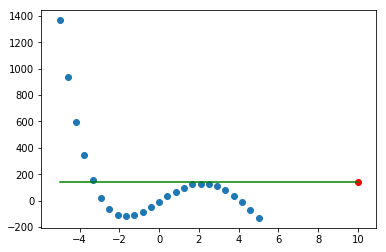

In [67]:
dummy = DummyRegressor()

dummy.fit(np.array(xs).reshape((-1,1)), ys)
xs1 = np.linspace(-5, 10, num)
plt.plot(xs1, dummy.predict(np.array(xs1).reshape(-1,1)), c='g')

plt.scatter(xs, ys)
plt.scatter(10, dummy.predict(np.array([10]).reshape(-1,1)), c='r')

plt.show()

Для более точных результатов надо использовать стандартные модели.

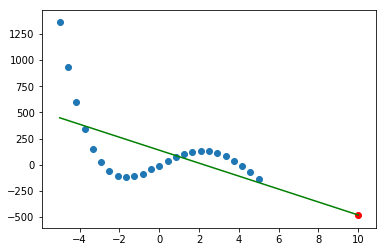

In [63]:
linreg = LinearRegression()

linreg.fit(np.array(xs).reshape((-1,1)), ys)
xs1 = np.linspace(-5, 10, num)
plt.plot(xs1, linreg.predict(np.array(xs1).reshape(-1,1)), c='g')

plt.scatter(xs, ys)
plt.scatter(10, linreg.predict(np.array([10]).reshape(-1,1)), c='r')

plt.show()

In [68]:
linreg.coef_

array([-61.9878636])

<a href='#toc'>Назад к Оглавлению</a>

## Создание конвейеров (pipelines) <a name='pipelines'></a>

Около 80% времени работы с данными уходит на обработку данных, поэтому на данном этапе важна качественная автоматизация.

Для объединения последовательности стандартных действий по обработке данных (например, удаление пустых значений, масштабирование и построение линейной регрессии) используют пайплайны. В библиотеке для этого есть инструменты
- sklearn.pipeline.make_pipeline
- sklearn.pipeline.Pipeline

In [70]:
num = 25
xs = np.linspace(-5, 5, num)
ys = xs**4 - 10*xs**3 + 100*xs - 10 + np.random.random(num)*5

In [78]:
pipeline1 = make_pipeline(LinearRegression())
pipeline2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
pipeline4 = make_pipeline(PolynomialFeatures(4), LinearRegression())

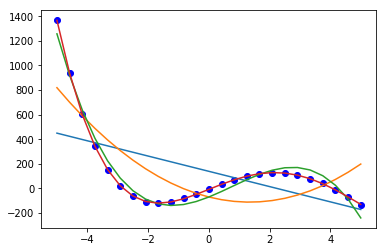

In [79]:
plt.scatter(xs, ys, c='b')
plt.plot(xs, pipeline1.fit(xs.reshape(-1,1), ys).predict(xs.reshape(-1,1)))
plt.plot(xs, pipeline2.fit(xs.reshape(-1,1), ys).predict(xs.reshape(-1,1)))
plt.plot(xs, pipeline3.fit(xs.reshape(-1,1), ys).predict(xs.reshape(-1,1)))
plt.plot(xs, pipeline4.fit(xs.reshape(-1,1), ys).predict(xs.reshape(-1,1)))
plt.show()

In [80]:
pipeline4

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [86]:
print("Найденные коэффициенты:", " ".join([str(round(c,2)) for c in pipeline4[1].coef_]))

Найденные коэффициенты: 0.0 99.7 0.02 -9.98 1.0


<a href='#toc'>Назад к Оглавлению</a>

# Ссылки <a name='links'></a>

- официальная страница библиотеки NumPy https://numpy.org

- официальная страница библиотеки Pandas https://pandas.pydata.org

- официальная страница библиотеки Scikit-learn http://scikit-learn.org

- платформа соревнований по машинному обучению https://kaggle.com

- https://www.openml.org/

- Google colab https://colab.research.google.com/

- https://t.me/DS_USURT

- учебник по SQL https://www.w3schools.com/

<a href='#toc'>Назад к Оглавлению</a>